In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')
from sklearn.metrics import accuracy_score

# Оценка и улучшение качества модели

# Кросс-валидация

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
x, y = iris.data, iris.target

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

разобъем данные на обучающий и тестовый наборы

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

создаем экземпляр модели и подгоняем его на обучающем наборе

In [9]:
DT = DecisionTreeClassifier(max_depth=35).fit(x_train, y_train)

оцениваем качество модели на тестовом наборе

In [10]:
print("Правильность на обучающем наборе: {:.2f}".format(DT.score(x_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(DT.score(x_test, y_test)))

Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 0.97


Найдем долю правильных ответов полученного алгоритма на обучающей выборке

In [11]:
y_pred_train = DT.predict(x_train)
accuracy_score(y_pred_train, y_train)

1.0

Теперь найдите долю правильных ответов полученного алгоритма на тестовой выборке

In [12]:
y_pred = DT.predict(x_test)
accuracy_score(y_pred, y_test)

0.9736842105263158

# Перекрестная проверка

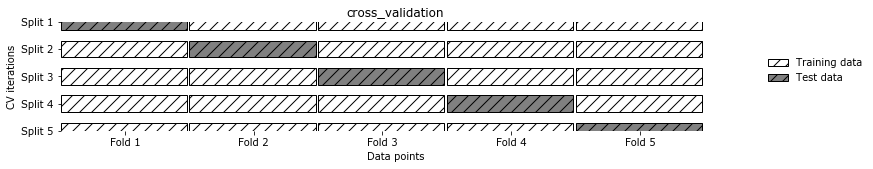

In [13]:
mglearn.plots.plot_cross_validation()

In [14]:
DT = DecisionTreeClassifier(max_depth=35)

In [15]:
scores = cross_val_score(DT, iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: {}".format(scores))
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Значения правильности перекрестной проверки: [0.96666667 0.96666667 0.9        1.         1.        ]
Средняя правильность перекрестной проверки: 0.97


мы получим более точную оценку качества классификатора

In [16]:
scores = cross_val_score(DT, iris.data, iris.target)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.98039216 0.92156863 1.        ]


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [17]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.97


# Стратифицированная k-блочная перекрестная проверка и другие стратегии


In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Метки ирисов:\n{}".format(iris.target))

Метки ирисов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


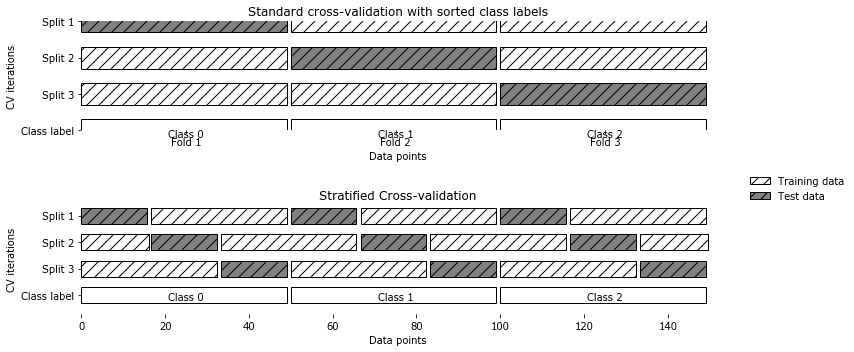

In [19]:
mglearn.plots.plot_stratified_cross_validation()

In [20]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [21]:
print("Значения правильности перекрестной проверки:\n{}".format(
      cross_val_score(DT, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         1.         0.86666667 0.93333333 0.73333333]


In [24]:
kkfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(DT, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         0.96666667 0.83333333 0.93333333 0.73333333]


In [25]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(DT, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.98 0.96 0.96]


#### Перекрестная проверка с исключением по одному


In [26]:
from sklearn.model_selection import LeaveOneOut

In [27]:
loo = LeaveOneOut()
scores = cross_val_score(DT, iris.data, iris.target, cv=loo)
print("Количество итераций cv: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций cv:  150
Средняя правильность: 0.95


### Перекрестная проверка со случайными перестановками при разбиении

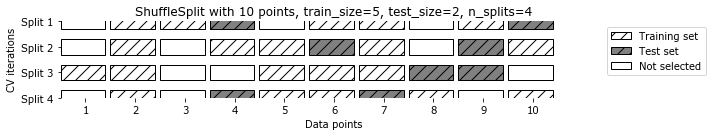

In [28]:
mglearn.plots.plot_shuffle_split()

In [29]:
from sklearn.model_selection import ShuffleSplit

In [30]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(DT, iris.data, iris.target, cv=shuffle_split)

In [31]:
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.92       0.94666667 0.94666667 0.96       0.89333333 0.93333333
 0.97333333 0.93333333 0.94666667 0.94666667]


#### Опасность переобучения параметров и проверочный набор данных

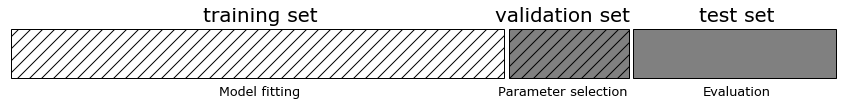

In [32]:
mglearn.plots.plot_threefold_split()

In [33]:
from sklearn.svm import SVC

##### разбиваем данные на обучающий+проверочный набор и тестовый набор

In [34]:
x_trainval, x_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

#### разбиваем обучающий+проверочный набор на обучающий и проверочный наборы

In [35]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_trainval, y_trainval, random_state=1)

In [36]:
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:"
      " {}\n".format(x_train.shape[0], x_valid.shape[0], x_test.shape[0]))

Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора: 38



In [38]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        score = svm.score(x_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


# Прогнозирование вероятностей классов

Решающее дерево позволяет предсказывать не только классы, но и вероятности классов - с помощью метода predict_proba.
Посмотрим на вероятности классов полученного решающего дерева и посчитаем значение AUC-ROC. Ответ округлим до двух знаков после запятой

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
clf_best = DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=3, min_samples_split=9, random_state=13).fit(x_train, y_train)

In [44]:
clf_best.feature_importances_

array([0.18385166, 0.        , 0.09666453, 0.71948381])

In [45]:
pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf_best.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

NameError: name 'X_train' is not defined